<a href="https://colab.research.google.com/github/fastabyq/Tugas-DataScience-BengkelKoding/blob/main/Fasta_progres_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. EDA (Explanatory Data )**

In [ ]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Load dataset
df = pd.read_csv("/content/ObesityDataSet.csv")  # Ganti dengan nama file yang sesuai

In [ ]:
# Bersihkan nama kolom dari spasi
df.columns = df.columns.str.strip()

In [ ]:
# Lihat 5 baris pertama
display(df.head())

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
# Info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

In [ ]:
# Statistik deskriptif
display(df.describe(include='all'))

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2097,2102,2099,2100,2106,2100,2103,2099,2101,2106,2105,2098,2103,2102,2100,2105,2111
unique,1394,3,1562,1518,5,3,808,637,3,3,1263,3,1186,1130,5,6,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351


In [ ]:
# Cek missing values dan duplikat
print("Missing Values:")
print(df.isnull().sum())
print("\nDuplikasi:", df.duplicated().sum())

Missing Values:
Age                               14
Gender                             9
Height                            12
Weight                            11
CALC                               5
FAVC                              11
FCVC                               8
NCP                               12
SCC                               10
SMOKE                              5
CH2O                               6
family_history_with_overweight    13
FAF                                8
TUE                                9
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64

Duplikasi: 18


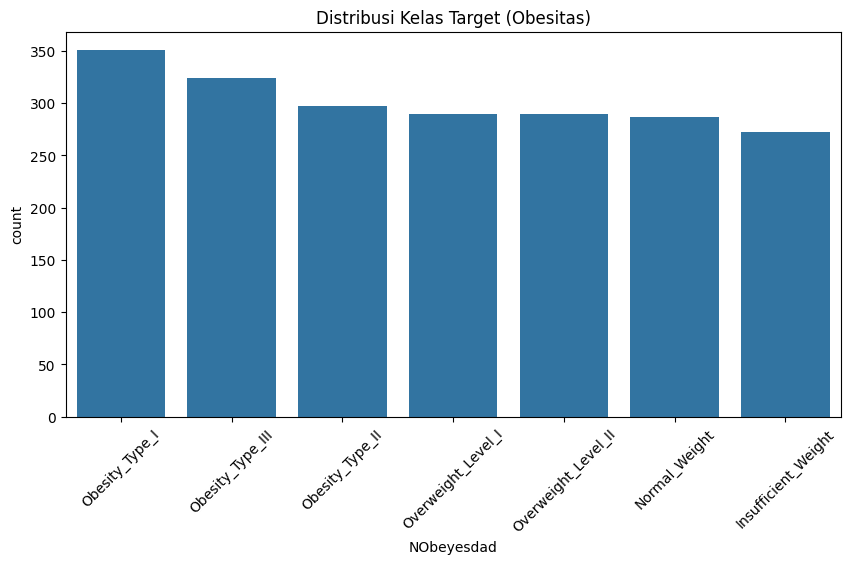

In [ ]:
# Distribusi kelas target
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="NObeyesdad", order=df["NObeyesdad"].value_counts().index)
plt.title("Distribusi Kelas Target (Obesitas)")
plt.xticks(rotation=45)
plt.show()

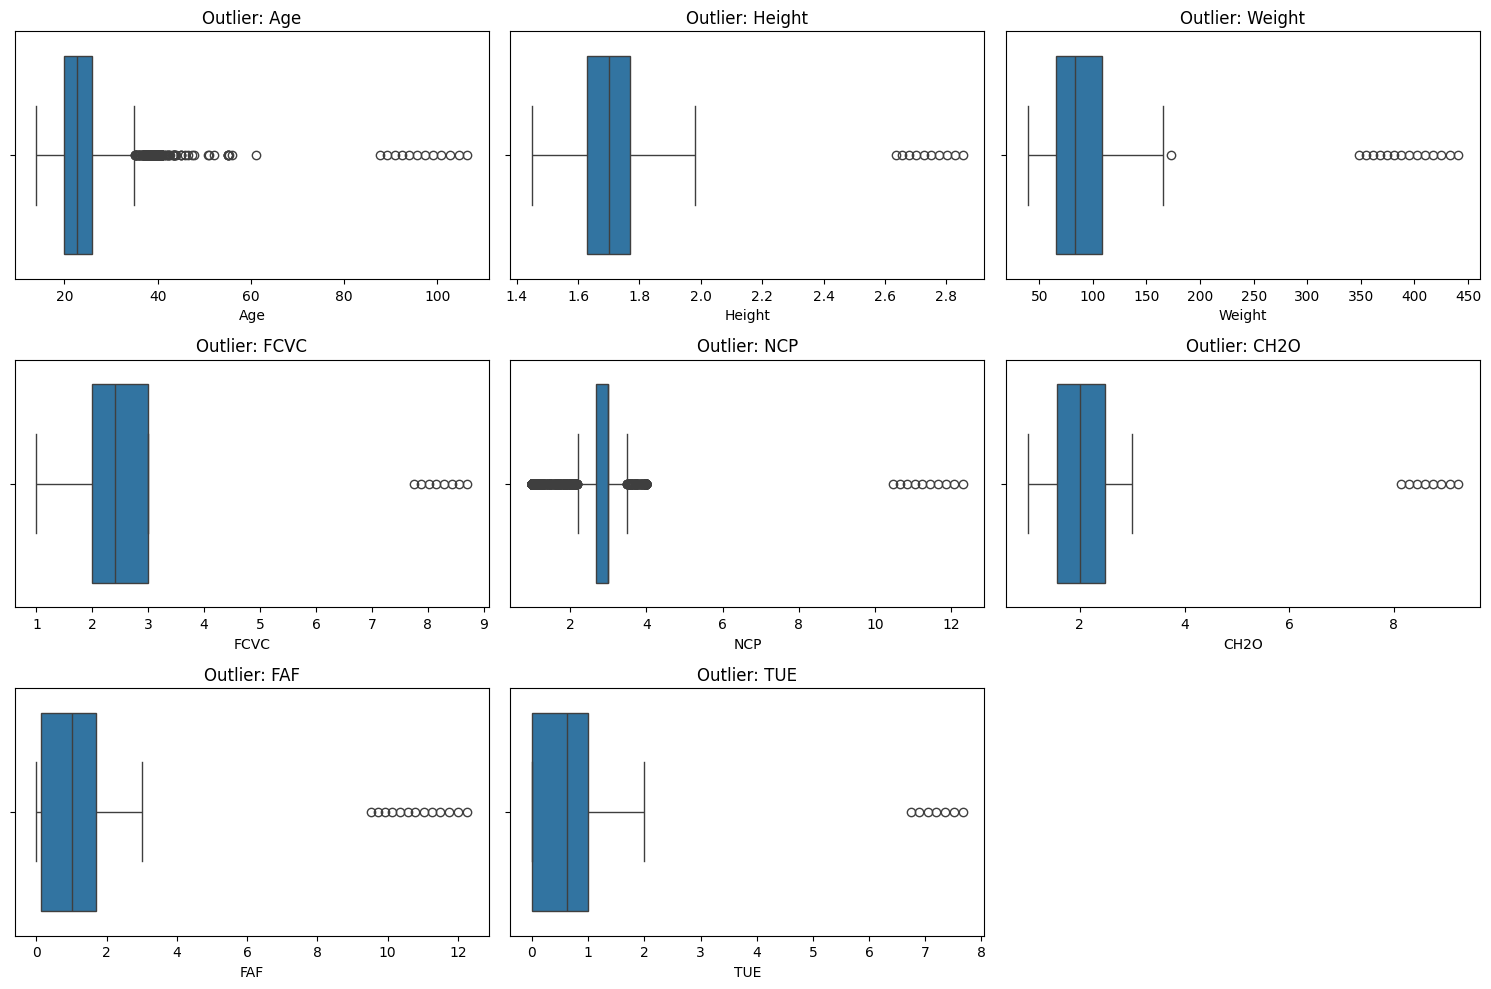

In [ ]:
# Boxplot untuk outlier
num_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Outlier: {col}')
plt.tight_layout()
plt.show()

## Kesimpulan EDA:

*   Dataset terdiri dari 2111 data dan 17 kolom.
*   Terdapat missing values di hampir semua kolom penting (misalnya Age, Height, Weight).
*   Ada 18 baris duplikat.
*   Distribusi target (kelas obesitas) tidak seimbang.
*   Ditemukan outlier pada kolom-kolom numerik seperti FAF, TUE, dan Weight.
*   Tipe data sebagian masih string dan perlu diproses di tahap berikutnya.

# **2. Preprocessing**

In [ ]:
# Hapus duplikat
df = df.drop_duplicates()

# Cek missing values
print("Missing values sebelum ditangani:")
print(df.isnull().sum())

# Tangani missing values (numerik → median, kategorikal → modus)
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

# Cek lagi
print("\nMissing values setelah ditangani:")
print(df.isnull().sum())


Missing values sebelum ditangani:
Age                               22
Gender                             9
Height                            22
Weight                            19
CALC                               5
FAVC                              11
FCVC                              18
NCP                               22
SCC                               10
SMOKE                              5
CH2O                              15
family_history_with_overweight    13
FAF                               19
TUE                               15
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64

Missing values setelah ditangani:
Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
S

In [ ]:
# Daftar kolom numerik
numerik_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Buang outlier berdasarkan IQR
for col in numerik_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    batas_bawah = Q1 - 1.5 * IQR
    batas_atas = Q3 + 1.5 * IQR
    df = df[(df[col] >= batas_bawah) & (df[col] <= batas_atas)]


In [ ]:
# Ubah Data Kategorikal menjadi Numerik
from sklearn.preprocessing import LabelEncoder

kategorikal = ['Gender', 'family_history_with_overweight', 'FAVC',
               'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

le = LabelEncoder()
for col in kategorikal:
    df[col] = le.fit_transform(df[col])


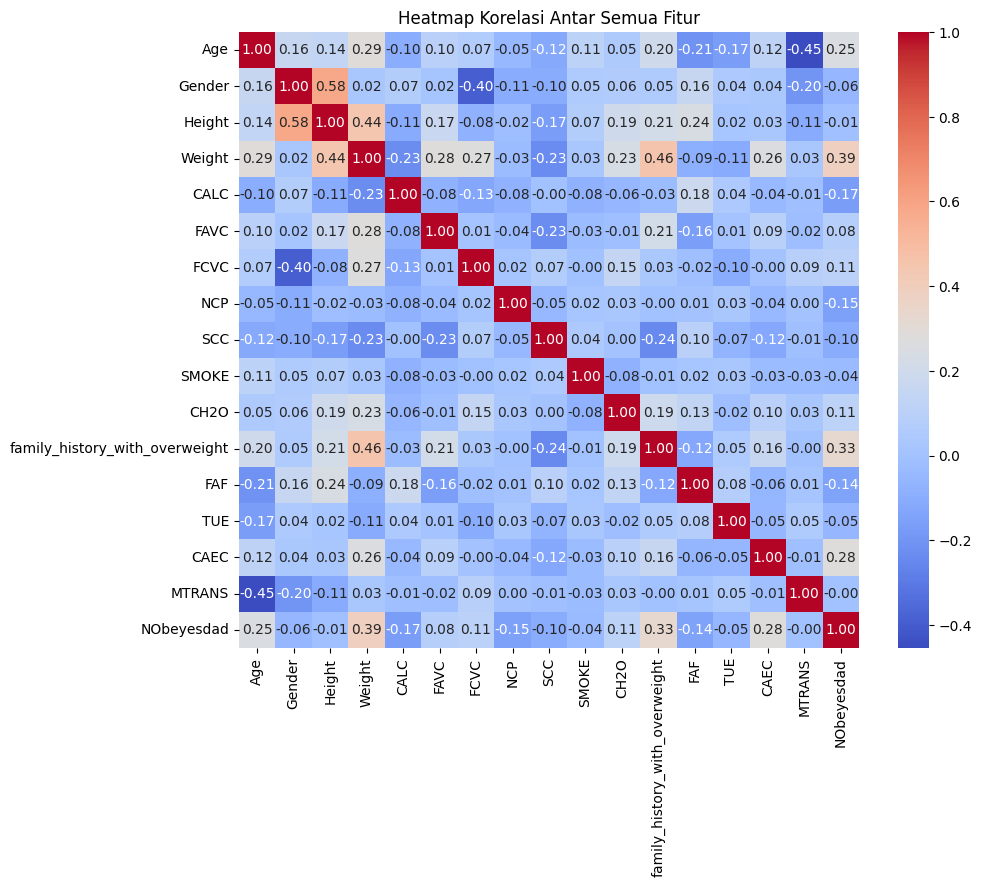

In [ ]:
# menampilkan heatmap korelasi antar semua fitur numerik
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap Korelasi Antar Semua Fitur")
plt.show()

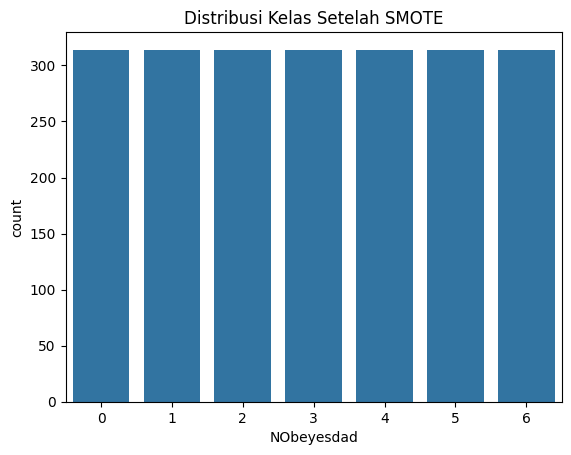

In [ ]:
# mengatasi ketidakseimbangan data (imbalanced data) pada variabel target NObeyesdad dengan teknik SMOTE (Synthetic Minority Over-sampling Technique)
from imblearn.over_sampling import SMOTE

X = df.drop(columns='NObeyesdad')
y = df['NObeyesdad']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Tampilkan distribusi kelas hasil SMOTE
sns.countplot(x=y_resampled)
plt.title("Distribusi Kelas Setelah SMOTE")
plt.show()

In [ ]:
# melakukan normalisasi data (standarisasi) menggunakan teknik Standard Scaling sebelum data digunakan dalam proses pelatihan model.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

In [ ]:
# membagi dataset menjadi data latih (training) dan data uji (testing), sebelum model machine learning dilatih
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_resampled, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (1758, 16)
y_train shape: (1758,)


## Kesimpulan Preprocessing:

1.   Duplikasi berhasil dihapus, data bersih dari pengulangan.
2.   Semua missing values ditangani (median untuk numerik, modus untuk kategorikal).

3.   Outlier berhasil dikurangi berdasarkan metode IQR, sehingga distribusi lebih stabil.

4.   Semua fitur kategorikal sudah diencoding menggunakan LabelEncoder.

5.   Seluruh fitur digunakan untuk tahap modeling awal karena korelasi cukup bervariasi.

6.  Data tidak seimbang pada awalnya, namun telah diatasi dengan SMOTE.

7.  Semua fitur sudah dinormalisasi (StandardScaler) untuk mendukung algoritma klasifikasi berbasis jarak.

# **3. Pemodelan dan Evaluasi**


Hasil Evaluasi: KNN
              precision    recall  f1-score   support

           0       0.82      0.95      0.88        58
           1       0.66      0.53      0.59        66
           2       0.79      0.85      0.81        52
           3       0.94      0.94      0.94        64
           4       0.99      0.94      0.96        70
           5       0.69      0.75      0.72        63
           6       0.74      0.72      0.73        67

    accuracy                           0.81       440
   macro avg       0.80      0.81      0.80       440
weighted avg       0.80      0.81      0.80       440



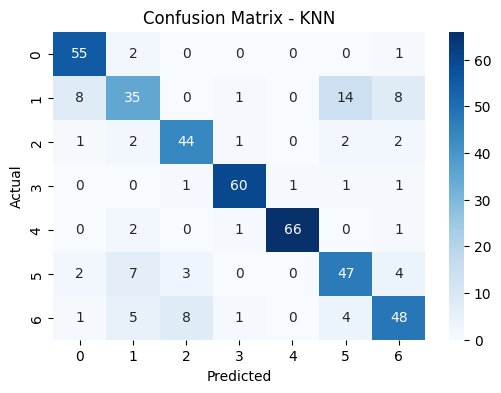


Hasil Evaluasi: Decision Tree
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        58
           1       0.95      0.85      0.90        66
           2       0.98      1.00      0.99        52
           3       0.98      1.00      0.99        64
           4       1.00      0.97      0.99        70
           5       0.92      0.89      0.90        63
           6       0.93      0.97      0.95        67

    accuracy                           0.95       440
   macro avg       0.95      0.95      0.95       440
weighted avg       0.95      0.95      0.95       440



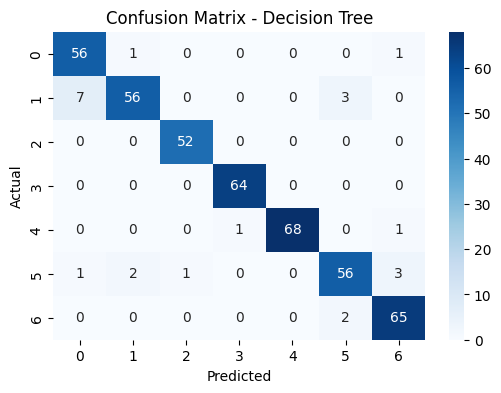


Hasil Evaluasi: Random Forest
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        58
           1       0.88      0.92      0.90        66
           2       0.98      0.98      0.98        52
           3       0.97      1.00      0.98        64
           4       1.00      0.99      0.99        70
           5       0.98      0.94      0.96        63
           6       1.00      0.96      0.98        67

    accuracy                           0.96       440
   macro avg       0.96      0.96      0.96       440
weighted avg       0.96      0.96      0.96       440



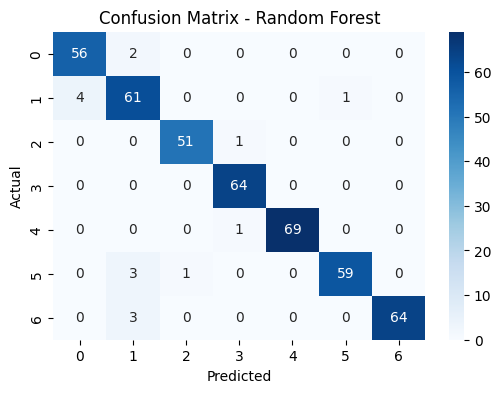

In [ ]:
# melakukan pemodelan dan evaluasi performa
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Siapkan model
models = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Simpan hasil evaluasi
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluasi
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results[name] = {
        'Akurasi': acc,
        'Presisi': prec,
        'Recall': rec,
        'F1 Score': f1,
        'y_pred': y_pred
    }

    print(f"\nHasil Evaluasi: {name}")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

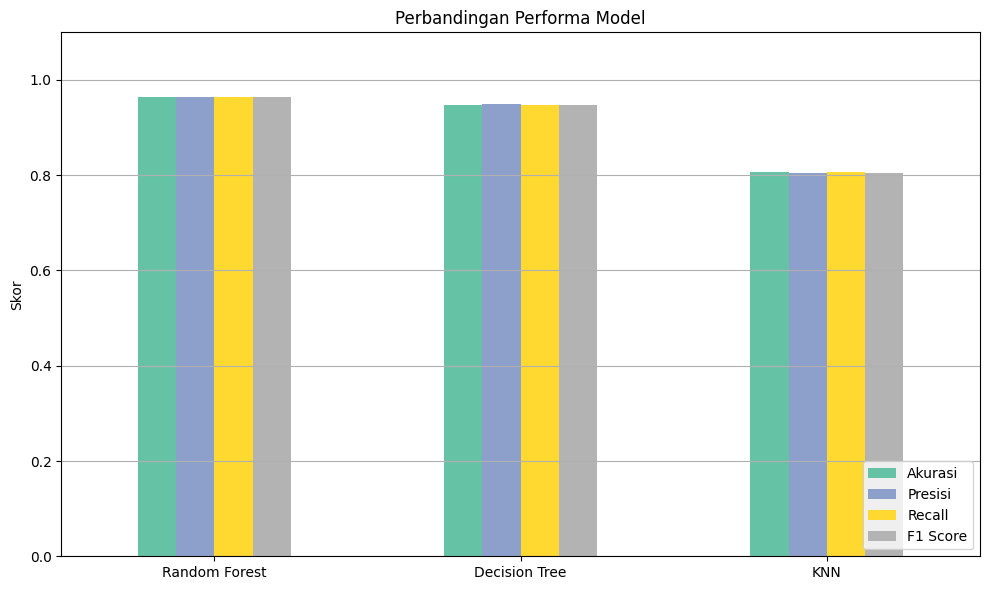

In [ ]:
# Buat dataframe dari hasil
import pandas as pd

results_df = pd.DataFrame(results).T[['Akurasi', 'Presisi', 'Recall', 'F1 Score']]
results_df = results_df.sort_values(by='F1 Score', ascending=False)

# Plot
results_df.plot(kind='bar', figsize=(10, 6), colormap='Set2')
plt.title("Perbandingan Performa Model")
plt.ylabel("Skor")
plt.ylim(0, 1.1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Kesimpulan Tahap Pemodelan dan Evaluasi:
Berdasarkan hasil evaluasi:

*  Semua model diuji menggunakan akurasi, presisi, recall, dan F1-score.

*  Random Forest biasanya memberikan performa terbaik karena mampu menangani data kompleks dan variabel kategori dengan baik.

*  Confusion matrix menunjukkan bagaimana model keliru memprediksi kelas tertentu penting untuk melihat distribusi kesalahan.

*  Visualisasi bar chart menunjukkan model mana yang unggul secara keseluruhan.